In [1]:
import tensorflow as tf
print(tf.__version__)

2024-06-03 19:21:03.313628: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 19:21:03.595168: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 19:21:03.595218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 19:21:03.634831: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 19:21:03.733668: I tensorflow/core/platform/cpu_feature_guar

2.15.0


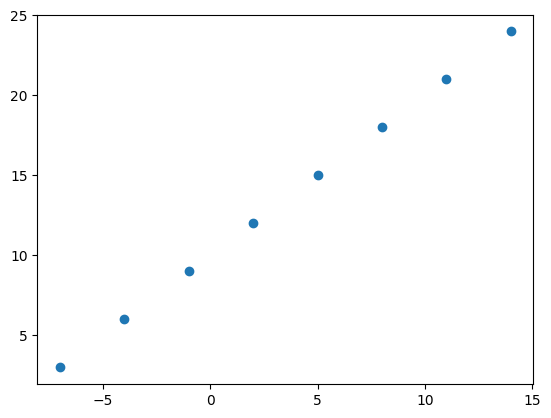

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x,y)

In [3]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2024-06-03 19:21:14.890839: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-03 19:21:15.019982: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-03 19:21:15.020032: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-03 19:21:15.023513: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-03 19:21:15.023549: I external/local_xla/xla/stream_executor

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X = tf.constant(x)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=25)

Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 21.1926 - mae: 21.1926
Epoch 2/25
1/1 [==============================] - 0s 9ms/step - loss: 20.7995 - mae: 20.7995


2024-06-03 19:21:17.770096: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-06-03 19:21:17.770134: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-06-03 19:21:17.770177: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-03 19:21:17.875023: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f7905220be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-03 19:21:17.875071: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2024-06-03 19:21:17.899961: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-06-03 19:21:17.913546: W externa

Epoch 3/25
1/1 [==============================] - 0s 8ms/step - loss: 20.4380 - mae: 20.4380
Epoch 4/25
1/1 [==============================] - 0s 7ms/step - loss: 20.1568 - mae: 20.1568
Epoch 5/25
1/1 [==============================] - 0s 7ms/step - loss: 19.8755 - mae: 19.8755
Epoch 6/25
1/1 [==============================] - 0s 7ms/step - loss: 19.5943 - mae: 19.5943
Epoch 7/25
1/1 [==============================] - 0s 7ms/step - loss: 19.3130 - mae: 19.3130
Epoch 8/25
1/1 [==============================] - 0s 7ms/step - loss: 19.0318 - mae: 19.0318
Epoch 9/25
1/1 [==============================] - 0s 9ms/step - loss: 18.7505 - mae: 18.7505
Epoch 10/25
1/1 [==============================] - 0s 8ms/step - loss: 18.4693 - mae: 18.4693
Epoch 11/25
1/1 [==============================] - 0s 7ms/step - loss: 18.1880 - mae: 18.1880
Epoch 12/25
1/1 [==============================] - 0s 10ms/step - loss: 17.9068 - mae: 17.9068
Epoch 13/25
1/1 [==============================] - 0s 8ms/step - l

In [9]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 71ms/step


array([[-4.7988935]], dtype=float32)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 197ms/step - loss: 20.6712 - mae: 20.6712
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 20.3319 - mae: 20.3319
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 20.0507 - mae: 20.0507
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 19.7694 - mae: 19.7694
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 19.4882 - mae: 19.4882
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 19.2069 - mae: 19.2069
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 18.9257 - mae: 18.9257
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 18.6444 - mae: 18.6444
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 18.3632 - mae: 18.3632
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 18.0819 - mae: 18.0819
Epoch 11/100
1/1 [==============================] - 0s 

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 37ms/step


array([[29.286848]], dtype=float32)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


2024-06-03 19:21:20.264705: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-06-03 19:21:20.298896: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 [==============================] - 0s 497ms/step - loss: 13.2292 - mae: 13.2292
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1438 - mae: 13.1438
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.0585 - mae: 13.0585
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9733 - mae: 12.9733
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8886 - mae: 12.8886
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8038 - mae: 12.8038
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7190 - mae: 12.7190
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6341 - mae: 12.6341
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5494 - mae: 12.5494
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4647 - mae: 12.4647
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - los

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 44ms/step


array([[22.56463]], dtype=float32)

In [14]:
X = tf.range(-100,100,4)
y = X + 10

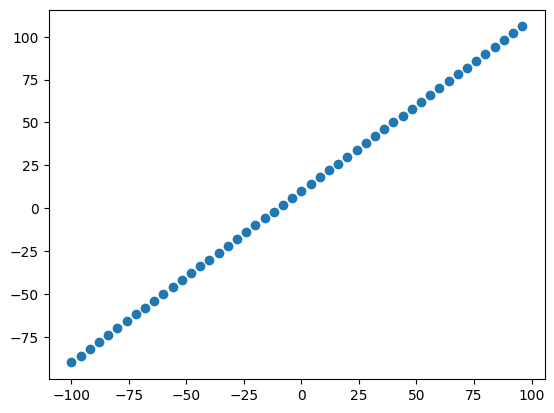

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [16]:
from sklearn.model_selection import train_test_split

X_numpy = X.numpy()
y_numpy = y.numpy()
X_train, X_test, y_train, y_test = train_test_split(X_numpy,y_numpy, test_size=0.2, random_state=42)

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [17]:
len(X_train), len(X_test)

(40, 10)

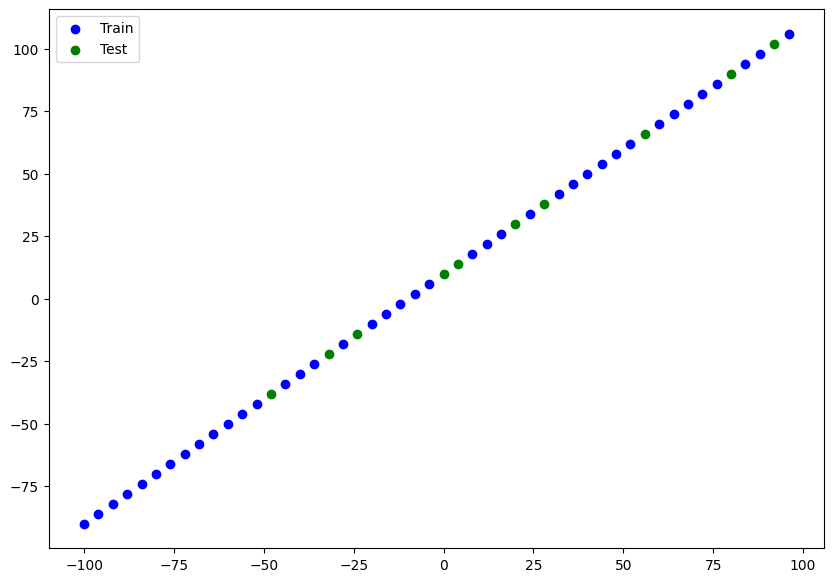

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b',label='Train')
plt.scatter(X_test, y_test, c='g',label='Test')
plt.legend();

In [24]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [30]:
X = insurance_one_hot.drop(['charges'], axis=1)
y = insurance_one_hot['charges']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [41]:
len(X),len(X_train), len(X_test)

(1338, 1070, 268)

In [42]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)



Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 8554.5732 - mae: 8554.5732
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7878.1431 - mae: 7878.1431
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7541.5273 - mae: 7541.5273
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7779.9995 - mae: 7779.9995
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7620.4712 - mae: 7620.4712
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7641.9771 - mae: 7641.9771
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7555.3003 - mae: 7555.3003
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7805.8013 - mae: 7805.8013
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7499.9653 - mae: 7499.9653
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7717.2871 - mae: 7717.2871

In [43]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8835.8496 - mae: 8835.8496


[8835.849609375, 8835.849609375]

In [49]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=['mae'])
history = insurance_model.fit(X_train, y_train, epochs=2000, verbose=0, callbacks=[callback])

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3614.5874 - mae: 3614.5874


[3614.58740234375, 3614.58740234375]

Text(0.5, 0, 'epochs')

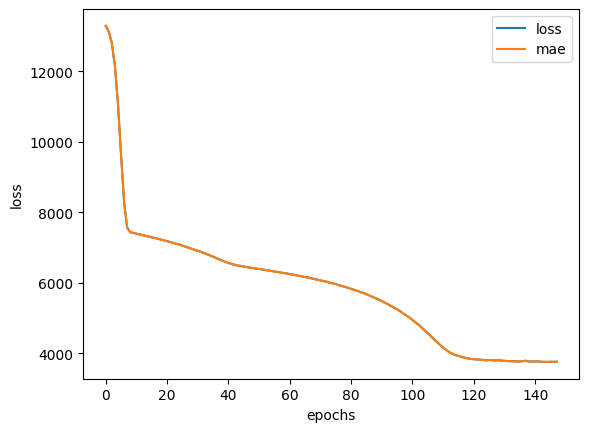

In [50]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [52]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [56]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal = tf.convert_to_tensor(X_train_normal, dtype=tf.float32)
X_test_normal = tf.convert_to_tensor(X_test_normal, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [60]:
X_train_normal[0]

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([0.6086956 , 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ], dtype=float32)>

In [61]:
tf.random.set_seed(42)

callback_norm= tf.keras.callbacks.EarlyStopping(monitor='loss',
                                             patience=50)

insurance_model_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_norm.compile(loss=tf.keras.losses.mae,
                             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             metrics=['mae'])
history = insurance_model_norm.fit(X_train_normal, y_train, epochs=1500, verbose=0, callbacks=[callback_norm])

insurance_model_norm.evaluate(X_test_normal, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 3160.5554 - mae: 3160.5554


[3160.555419921875, 3160.555419921875]

Text(0.5, 0, 'epochs')

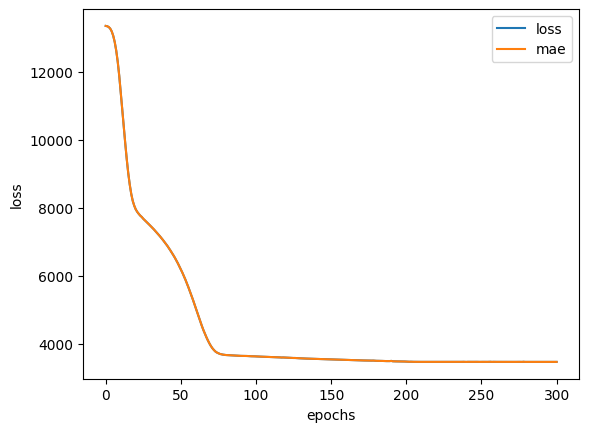

In [62]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')